## Introduction
For this data science project we are going to analyze startup companies from a variety of different industries and countries. Startups are a crucial part of the economy as they promote innovation, new jobs, and competition. However, determining the valuation of a startup can be difficult, as there are many different factors that set them apart. With our analysis, we intend on answering the questions: What variables are strongly associated with a startups valution? and can we use those variables to accurately predict valuation or growth rate using machine learning models?

Answering these questions is important because it can help investors make better decisions about startups, and refine their investment strategies. Accurately predicting the valuation and grow rate of a startup can help investors identify high potential ventures earlier, leading to higher profits. Investing in startups can be risky due to a lot of uncertainty, so using all the tools and information at your disposal is critical. 

In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('investment_data.csv')
print(df.dtypes)


df

Startup Name                object
Industry                    object
Funding Rounds               int64
Investment Amount (USD)    float64
Valuation (USD)            float64
Number of Investors          int64
Country                     object
Year Founded                 int64
Growth Rate (%)            float64
dtype: object


,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00
...,...,...,...,...,...,...,...,...,...
4995,Startup_4996,EdTech,5,4.015771e+09,1.212346e+10,29,Germany,2002,64.08
4996,Startup_4997,AI,2,3.619535e+09,1.107936e+10,14,Brazil,2000,151.29
4997,Startup_4998,SaaS,10,4.257640e+08,8.277586e+08,29,UK,2018,140.43
4998,Startup_4999,SaaS,4,4.220592e+08,1.895497e+09,6,India,2017,122.93


## Hypothesis testing

- HO: The number of investors does not have an effect on the valuation
- HA: The number of investors does have an effect on the valuation

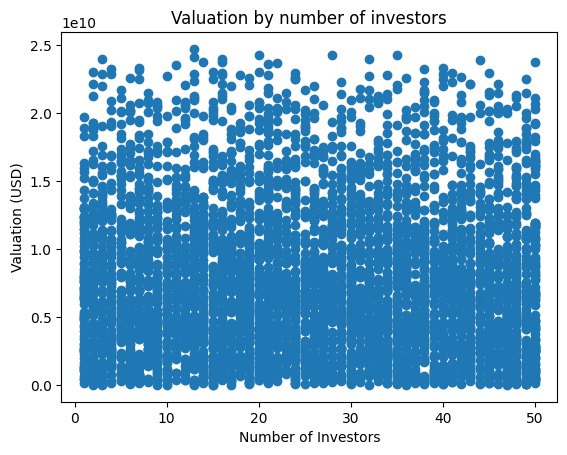

In [5]:
plt.figure()
plt.scatter(df['Number of Investors'], df['Valuation (USD)'])
plt.xlabel('Number of Investors')
plt.ylabel('Valuation (USD)')
plt.title('Valuation by number of investors')
plt.show()

In [6]:
res = stats.pearsonr(df['Valuation (USD)'], df['Number of Investors'])
print(res.pvalue)

0.2913937276637453


Since this value is larger than .05, we cannot reject the null hypothesis. This means that number of investors does not have an effect on valuation.

## Conclusion #2

We want to see if industry has a significant relationship with Valuation of a company?


H0: The mean valuation is the same across all industries.

HA: At least one industry has a mean valuation that is significantly different from the others

np.float64(0.29055309061857243)

Industry
AI            8.212621e+09
E-commerce    8.167838e+09
Fintech       8.117729e+09
Biotech       8.064938e+09
Blockchain    7.946256e+09
EdTech        7.938860e+09
SaaS          7.916092e+09
HealthTech    7.466786e+09
Name: Valuation (USD), dtype: float64

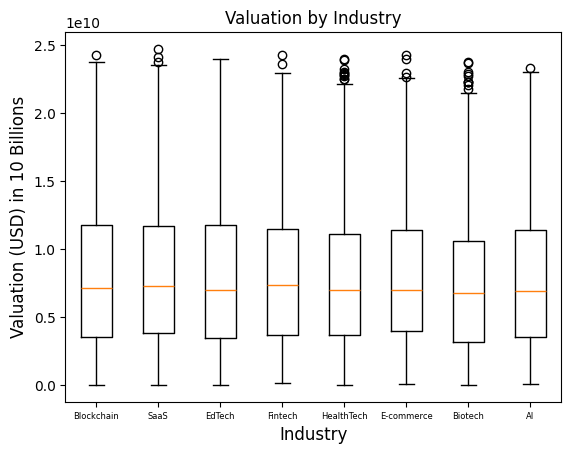

In [31]:
from scipy.stats import f_oneway
industries = [group["Valuation (USD)"].values for name, group in df.groupby("Industry")]
anova_stat, p_val = f_oneway(*industries)
industries_names = df['Industry'].unique()
# Calculate the average valuation per industry for context
avg_valuation_by_industry = df.groupby("Industry")["Valuation (USD)"].mean().sort_values(ascending=False)

display(p_val), display(avg_valuation_by_industry)


plt.boxplot(industries, tick_labels=industries_names )
plt.title('Valuation by Industry', fontsize = 12)
plt.xticks(fontsize= 6)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Valuation in 10 Billions (USD)', fontsize=12)
plt.show()

Since our p value of 0.29 > 0.05 we fail reject our null hypothesis 

This leads us to believe that there is no statistically significant evidence that average startup valuations differ across industries 

## Conclusion #3

H0: Investment amount has no affect on valuation

HA: Investment amount has an affect on valuation

'P value of: 0.0'

'Correlation value of: 0.8466722515612712'

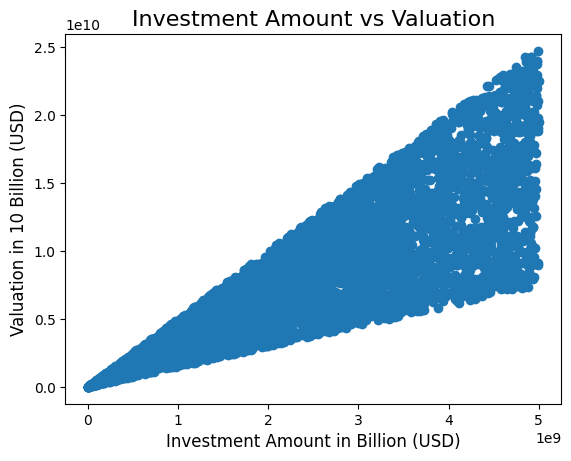

In [63]:
from scipy.stats import spearmanr

corr_invest_val, p_val = stats.pearsonr(df["Investment Amount (USD)"], df["Valuation (USD)"])


display(f"P value of: {p_val}")
display(f"Correlation value of: {corr_invest_val}")

plt.scatter(df["Investment Amount (USD)"], df["Valuation (USD)"])
plt.title("Investment Amount vs Valuation", fontsize=16)
plt.xlabel("Investment Amount in Billion (USD)", fontsize=12)
plt.ylabel("Valuation in 10 Billion (USD)", fontsize=12)

plt.show()

Because of our correlation value of 0.84 and p value of 0.0 which is a lot smaller than our alpha of 0.05 we can conclude that investment amount has a posititve affect of the valuation of a company.